In [1]:
## Título:
# Análise da Taxa de Desemprego no Brasil (IBGE)

In [2]:
## Contexto:
# Este projeto analisa a evolução da taxa de desemprego no Brasil com base em dados públicos do IBGE, avaliando o impacto da pandemia da COVID-19 sobre o mercado de trabalho.


In [3]:
## Fonte dos Dados:
# Instituto Brasileiro de Geografia e Estatística (IBGE) – PNAD Contínua.


In [4]:
# Aqui realizei a leitura e limpeza de dados públicos (CSV semi-estruturado)

import pandas as pd          # Aqui estou importanto a biblioteca Pandas. Com ela conseguimos ler arquivos como CSV, criar e organizar tabelas e etc.

df = pd.read_csv(
    "dados/tabela4099.csv",  # Aqui estou utilizando o Pandas para acessar e ler o CSV do IBGE "tabela4099" que fala sobre a evolução da taxa de desemprego no Brasil.
    sep=";",                 # O pandas automaticamente considera que cada célula é separada por vírgula, porém nesse caso a "tabela4099" não segue esse padrão. Estamos alterando para ";" a fim de evitar erros.
    encoding="latin1",       # Arquivos do IBGE normalmente usam Latin-1, não UTF-8. Sem essa linha o Pandas pode falhar ao ler.
    skiprows=3,              # Pula título e linha vazia. O CSV do IBGE possui muitas explicações irrelevantes para a análise de dados nas primeiras linhas.
    nrows=1                  # lê só a linha do Brasil. Impede o pandas de ler Fonte e Notas, outras explicações irrelevantes que têm após os dados que queremos.
)

df

,Unnamed: 0,1Âº trimestre 2019,2Âº trimestre 2019,3Âº trimestre 2019,4Âº trimestre 2019,1Âº trimestre 2020,2Âº trimestre 2020,3Âº trimestre 2020,4Âº trimestre 2020,1Âº trimestre 2021,...,2Âº trimestre 2023,3Âº trimestre 2023,4Âº trimestre 2023,1Âº trimestre 2024,2Âº trimestre 2024,3Âº trimestre 2024,4Âº trimestre 2024,1Âº trimestre 2025,2Âº trimestre 2025,3Âº trimestre 2025
0,Brasil,"12,8","12,1","11,9","11,1","12,4","13,6","14,9","14,2","14,9",...,"8,0","7,7","7,4","7,9","6,9","6,4","6,2","7,0","5,8","5,6"


In [5]:
df.rename(columns={df.columns[0]: "Região"}, inplace=True)   # Alterei o nome da primeira coluna de "Unnamed: 0" para "Região".

# Para evitar possíveis problemas na hora de realizar os cálculos com o Pandas, troquei a "," por "." nos números presentes em cada coluna:

for col in df.columns[1:]:
    df[col] = (
        df[col]
        .str.replace(",", ".", regex=False)
        .astype(float)
    )

df

,Região,1Âº trimestre 2019,2Âº trimestre 2019,3Âº trimestre 2019,4Âº trimestre 2019,1Âº trimestre 2020,2Âº trimestre 2020,3Âº trimestre 2020,4Âº trimestre 2020,1Âº trimestre 2021,...,2Âº trimestre 2023,3Âº trimestre 2023,4Âº trimestre 2023,1Âº trimestre 2024,2Âº trimestre 2024,3Âº trimestre 2024,4Âº trimestre 2024,1Âº trimestre 2025,2Âº trimestre 2025,3Âº trimestre 2025
0,Brasil,12.8,12.1,11.9,11.1,12.4,13.6,14.9,14.2,14.9,...,8.0,7.7,7.4,7.9,6.9,6.4,6.2,7.0,5.8,5.6


In [6]:
# Corrigindo os nomes das colunas:

df.columns = (
    df.columns
    .str.replace("Â", "", regex=False)
)

df

,Região,1º trimestre 2019,2º trimestre 2019,3º trimestre 2019,4º trimestre 2019,1º trimestre 2020,2º trimestre 2020,3º trimestre 2020,4º trimestre 2020,1º trimestre 2021,...,2º trimestre 2023,3º trimestre 2023,4º trimestre 2023,1º trimestre 2024,2º trimestre 2024,3º trimestre 2024,4º trimestre 2024,1º trimestre 2025,2º trimestre 2025,3º trimestre 2025
0,Brasil,12.8,12.1,11.9,11.1,12.4,13.6,14.9,14.2,14.9,...,8.0,7.7,7.4,7.9,6.9,6.4,6.2,7.0,5.8,5.6


In [7]:
# Transformando DataFrame em formato longo (tidy data):

df_long = df.melt(
    id_vars="Região",
    var_name="Periodo",
    value_name="Taxa de desemprego"
)

df_long.head()


,Região,Periodo,Taxa de desemprego
0,Brasil,1º trimestre 2019,12.8
1,Brasil,2º trimestre 2019,12.1
2,Brasil,3º trimestre 2019,11.9
3,Brasil,4º trimestre 2019,11.1
4,Brasil,1º trimestre 2020,12.4


In [8]:
import re     # Importando Regex, uma "ferramenta para procurar padrões dentro de texto”

# Nessa função criei uma coluna que traduzisse as strings da coluna "Período" em datas. É importante transformar períodos trimestrais em datetime para permitir análises temporais.

def periodo_para_data(texto):
    trimestre = int(re.search(r"(\d)º", texto).group(1))
    ano = int(re.search(r"(20\d{2})", texto).group(1))
    mes = {1: 1, 2: 4, 3: 7, 4: 10}[trimestre]
    return pd.Timestamp(year=ano, month=mes, day=1)

df_long["Data"] = df_long["Periodo"].apply(periodo_para_data)

df_long.head()

,Região,Periodo,Taxa de desemprego,Data
0,Brasil,1º trimestre 2019,12.8,2019-01-01
1,Brasil,2º trimestre 2019,12.1,2019-04-01
2,Brasil,3º trimestre 2019,11.9,2019-07-01
3,Brasil,4º trimestre 2019,11.1,2019-10-01
4,Brasil,1º trimestre 2020,12.4,2020-01-01


In [9]:
# Extraindo o ano de cada coluna para realizar abaixo o cálculo de média:

df_long["Ano"] = df_long["Data"].dt.year


In [10]:
# Após tratamento dos dados, comecei os cálculos. Aqui calculei a média da taxa de desemprego antes e durante a pandemia:

media_antes = df_long[df_long["Ano"] <= 2019]["Taxa de desemprego"].mean()

media_durante = df_long[
    (df_long["Ano"] >= 2020) & (df_long["Ano"] <= 2021)
]["Taxa de desemprego"].mean()

media_antes, media_durante


(np.float64(11.975), np.float64(13.5))

In [11]:
# Garantindo a ordem temporal, importante para realizar os gráficos com matplotlib depois.
df_long = df_long.sort_values("Data")

# Cálculo que traz a variação em relação ao trimestre anterior:
df_long["Variacao_trimestral"] = df_long["Taxa de desemprego"].diff()

df_long[["Data", "Taxa de desemprego", "Variacao_trimestral"]].head()


,Data,Taxa de desemprego,Variacao_trimestral
0,2019-01-01,12.8,NaN
1,2019-04-01,12.1,-0.7
2,2019-07-01,11.9,-0.2
3,2019-10-01,11.1,-0.8
4,2020-01-01,12.4,1.3


In [12]:
# Criando a média movel de 4 trimestres (1 ano) da taxa de desemprego, para suavizar variações de curto prazo e revelar a tendência:

df_long["Media_movel_4T"] = (
    df_long["Taxa de desemprego"]
    .rolling(window=4)
    .mean()
)

df_long[["Data", "Taxa de desemprego", "Media_movel_4T"]].head(8)


,Data,Taxa de desemprego,Media_movel_4T
0,2019-01-01,12.8,NaN
1,2019-04-01,12.1,NaN
2,2019-07-01,11.9,NaN
3,2019-10-01,11.1,11.975
4,2020-01-01,12.4,11.875
5,2020-04-01,13.6,12.250
6,2020-07-01,14.9,13.000
7,2020-10-01,14.2,13.775


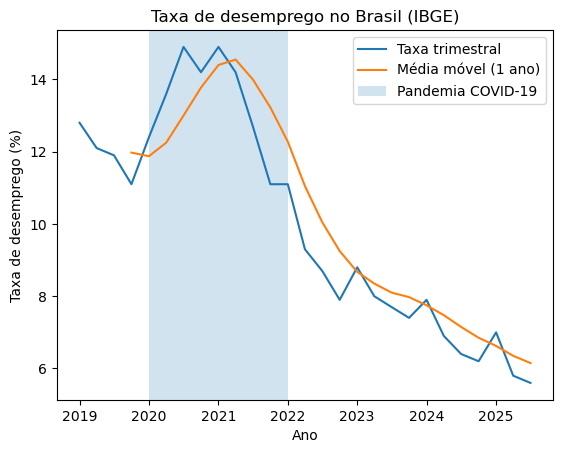

In [13]:
# Criação do gráfico com base nos cálculos feitos anteriormente:

import matplotlib.pyplot as plt

plt.figure()

# Linhas principais
plt.plot(
    df_long["Data"],
    df_long["Taxa de desemprego"],
    label="Taxa trimestral"
)

plt.plot(
    df_long["Data"],
    df_long["Media_movel_4T"],
    label="Média móvel (1 ano)"
)

# Destacar pandemia (2020–2021)
inicio_pandemia = pd.Timestamp("2020-01-01")
fim_pandemia = pd.Timestamp("2021-12-31")

plt.axvspan(
    inicio_pandemia,
    fim_pandemia,
    alpha=0.2,
    label="Pandemia COVID-19"
)

# Rótulos
plt.xlabel("Ano")
plt.ylabel("Taxa de desemprego (%)")
plt.title("Taxa de desemprego no Brasil (IBGE)")
plt.legend()

plt.show()


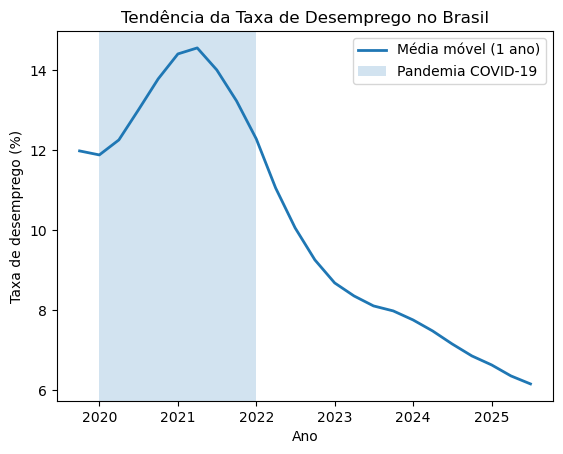

In [14]:
# Gráfico mais limpo e fácil de ler utilizando somente a média movel:

plt.figure()

# linha de tendência (média móvel)
plt.plot(
    df_long["Data"],
    df_long["Media_movel_4T"],
    label="Média móvel (1 ano)",
    linewidth=2
)

# destacar pandemia
plt.axvspan(
    pd.Timestamp("2020-01-01"),
    pd.Timestamp("2021-12-31"),
    alpha=0.2,
    label="Pandemia COVID-19"
)

# títulos e rótulos
plt.title("Tendência da Taxa de Desemprego no Brasil")
plt.xlabel("Ano")
plt.ylabel("Taxa de desemprego (%)")

plt.legend()

plt.savefig(
    "grafico_tendencia.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


In [15]:
## Principais Resultados

# Houve aumento significativo da taxa de desemprego durante 2020 e 2021
# O pico ocorreu em 2021
# A média móvel evidencia uma tendência de recuperação no período pós-pandemia


In [16]:
# Foram utilizadas duas visualizações: a primeira apresenta a taxa trimestral juntamente com a média móvel anual, enquanto a segunda foca exclusivamente na tendência de longo prazo, facilitando a interpretação do impacto da pandemia no mercado de trabalho.